In [2]:
import random

import matplotlib.pyplot as plt
import talib
from data.FileSticksDaoV2 import get_all_sticks
from data.Symbols import healthy_shares

symbols = healthy_shares()
interval = 1440
symbol = w(symbols)

candle_names = talib.get_function_groups()['Pattern Recognition']

sticks = get_all_sticks(symbol, interval)


In [2]:
# create columns for each pattern
for candle in candle_names:
    # below is same as;
    sticks[candle] = getattr(talib, candle)(sticks['ask_open'], sticks['ask_high'], sticks['ask_low'], sticks['ask_close'])


/Users/benny/miniconda3/envs/happy-machine-python/lib/python3.10/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


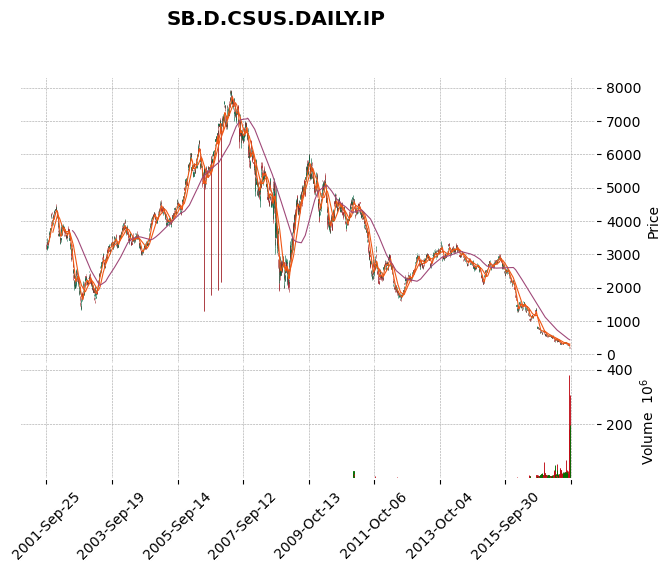

In [32]:
from swing_trainer.main import plot_chart

plot_chart(symbol, sticks)

In [31]:
sticks

,symbol,stick_datetime,ask_open,ask_high,ask_low,ask_close,bid_open,bid_high,bid_low,bid_close,volume,interval,epoch_utc_ms
0,SB.D.CSUS.DAILY.IP,2001-09-25 04:00:00+00:00,3295.0,3297.0,3170.0,3170.0,3295.0,3297.0,3170.0,3170.0,84300,1440,1001390400000
1,SB.D.CSUS.DAILY.IP,2001-09-26 04:00:00+00:00,3225.0,3236.0,3187.0,3236.0,3225.0,3236.0,3187.0,3236.0,65200,1440,1001476800000
2,SB.D.CSUS.DAILY.IP,2001-09-27 04:00:00+00:00,3191.0,3240.0,3165.0,3240.0,3191.0,3240.0,3165.0,3240.0,52100,1440,1001563200000
3,SB.D.CSUS.DAILY.IP,2001-09-28 04:00:00+00:00,3352.0,3500.0,3352.0,3500.0,3352.0,3500.0,3352.0,3500.0,47300,1440,1001649600000
4,SB.D.CSUS.DAILY.IP,2001-10-01 04:00:00+00:00,3345.0,3365.0,3335.0,3365.0,3345.0,3365.0,3335.0,3365.0,29400,1440,1001908800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,SB.D.CSUS.DAILY.IP,2023-03-15 04:00:00+00:00,178.0,224.0,178.0,217.0,175.0,221.0,175.0,214.0,381116936,1440,1678852800000
3992,SB.D.CSUS.DAILY.IP,2023-03-16 04:00:00+00:00,232.0,233.0,213.0,217.0,229.0,230.0,210.0,214.0,183995698,1440,1678939200000
3993,SB.D.CSUS.DAILY.IP,2023-03-17 04:00:00+00:00,206.0,211.0,196.0,202.0,203.0,208.0,193.0,199.0,118290912,1440,1679025600000
3994,SB.D.CSUS.DAILY.IP,2023-03-20 04:00:00+00:00,92.2,109.0,91.2,95.5,90.1,106.0,89.0,93.5,307752635,1440,1679284800000


## focus on one symbol and plot score over time

In [30]:
symbol = "SB.D.CSUS.DAILY.IP"
sticks = get_all_sticks(symbol, interval)

In [ ]:

sticks['score'] = 0
patterns = talib.get_function_groups()['Pattern Recognition']

for i in range(1, len(sticks)):
    score = 0
    for pattern in patterns:
        # below is same as;
        pattern_scores = getattr(talib, pattern)(sticks['ask_open'][0:i], sticks['ask_high'][0:i], sticks['ask_low'][0:i], sticks['ask_close'][0:i])
        score += pattern_scores.iloc[-1]
    sticks.at[i, 'score'] = score

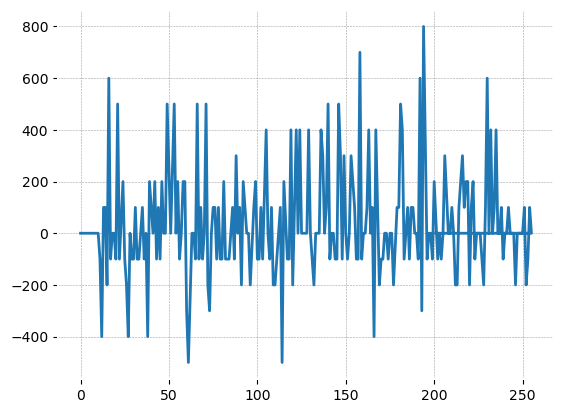

In [25]:
from matplotlib import pyplot as plt
plt.plot(sticks['score'])